## 1) Importar paquetes

In [185]:
import pandas as pd                    # Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           # Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() #visualización usando seaborn

## 2) Leer base de datos

In [186]:
df = pd.read_csv('C:\\Users\\USUARIO\\Downloads\\daespuga_Costo de casa.csv',sep=",",index_col=0)
del(df['No'])
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## 3) Estructura y primeras observaciones de la base de datos:

In [187]:
df.head(10)         # Aquí visualizamos la parte inicial de los datos 
                  # dt.head(10) muestra las 10 primeras observaciones

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


## Descripción del data frame

In [188]:
df.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Matriz de dispersión

La matriz de dispersión nos ayuda a observar la manera como se distribuyen los datos, respecto a la variable dependiente y a las demás variables independientes; lo cuál nos ayuda a dar una noción acerca de la elección de nuestras variables independientes para la regresión lineal múltiple.

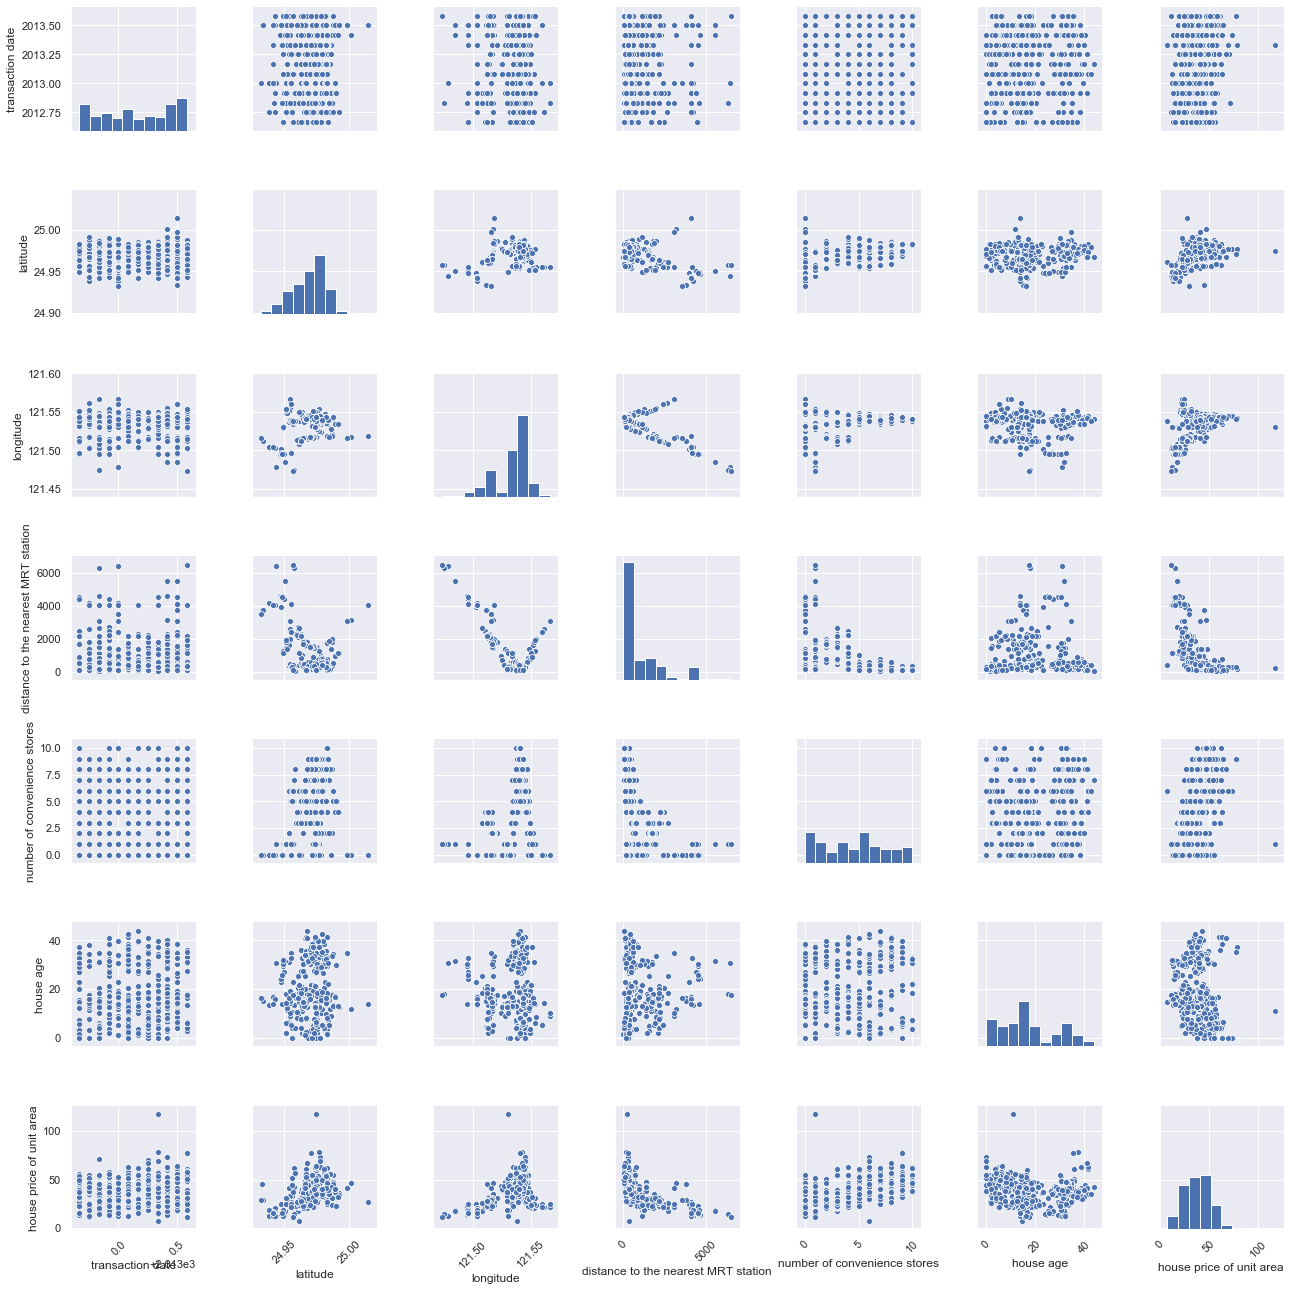

In [189]:
Matrizdedispersion=df[["transaction date", "latitude","longitude","distance to the nearest MRT station","number of convenience stores","house age","house price of unit area"]]
g=sns.pairplot(Matrizdedispersion,diag_kind="hist")
for ax in g.axes.flat:
     plt.setp(ax.get_xticklabels(), rotation=45)

## Mapa de calor

El mapa de calor nos dan señales visuales sobre cómo se agrupan los datos respecto a la variable dependiente (precio de superficie unitaria).

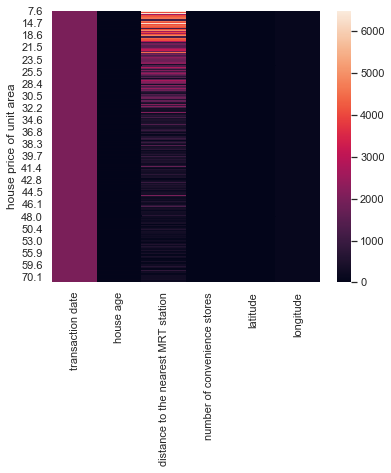

In [190]:
plt.figure(figsize=(6,5))
df_1 = df.groupby(by="house price of unit area").mean()
sns.heatmap(data=df_1[['transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude']])
plt.show()

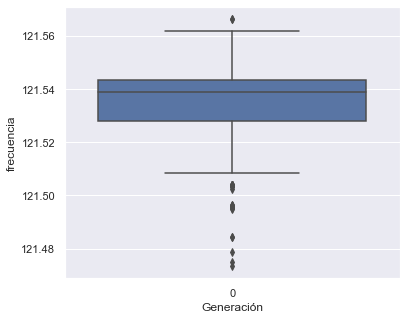

In [191]:
plt.figure(figsize=(6,5))
x = df["longitude"]
ax=sns.boxplot(data=x)
plt.xlabel("Generación")
plt.ylabel("frecuencia")
plt.show()

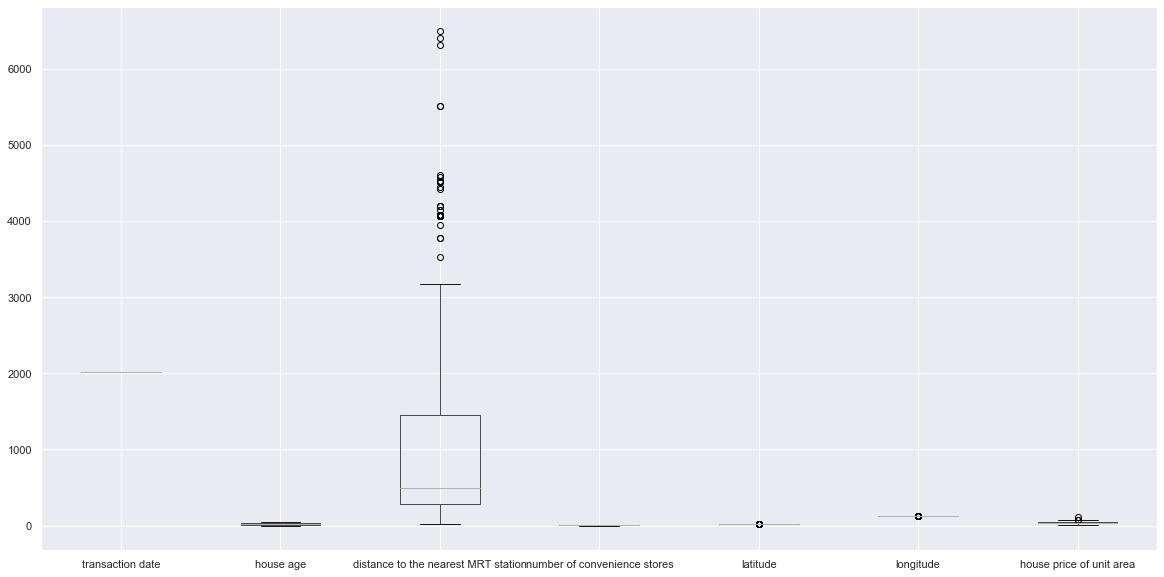

In [192]:
plt.figure(figsize=(20,10))
plt.savefig('Diagrama de caja del dataset.png')
df.boxplot()
plt.show()

Ahora graficaremos los diagramas de caja de cada variable para observar la concentración la mayor parte de los datos.

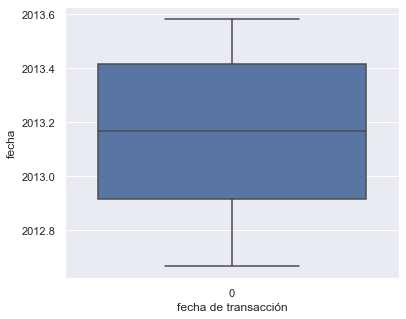

In [193]:
plt.figure(figsize=(6,5))
x = df["transaction date"]
ax=sns.boxplot(data=x)
plt.xlabel("fecha de transacción")
plt.ylabel("fecha")
plt.savefig('Diagrama de caja fecha de transacción.png')
plt.show()

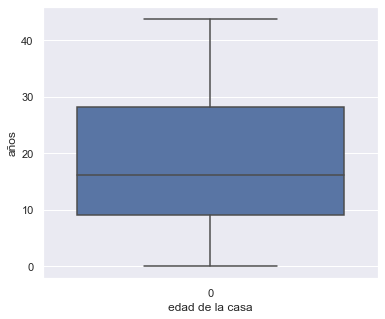

In [194]:
plt.figure(figsize=(6,5))
x = df["house age"]
ax=sns.boxplot(data=x)
plt.xlabel("edad de la casa")
plt.ylabel("años")
plt.savefig('Diagrama de caja edad de la casa.png')
plt.show()

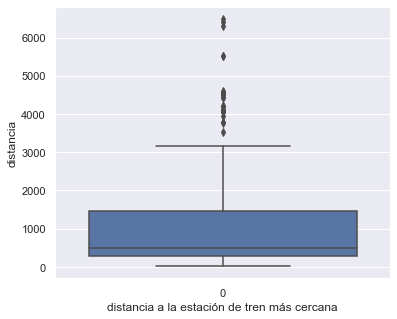

In [195]:
plt.figure(figsize=(6,5))
x = df["distance to the nearest MRT station"]
ax=sns.boxplot(data=x)
plt.xlabel("distancia a la estación de tren más cercana")
plt.ylabel("distancia")
plt.savefig('Diagrama de cajadistancia a la estación de tren más cercana.png')
plt.show()

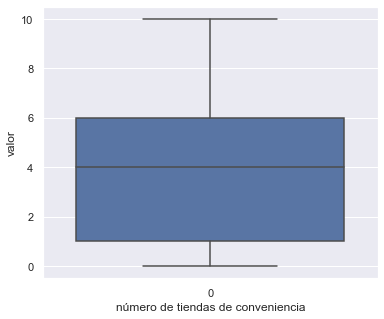

In [196]:
plt.figure(figsize=(6,5))
x = df["number of convenience stores"]
ax=sns.boxplot(data=x)
plt.xlabel("número de tiendas de conveniencia")
plt.ylabel("valor")
plt.savefig('Diagrama de caja número de tiendas de conveniencia.png')
plt.show()

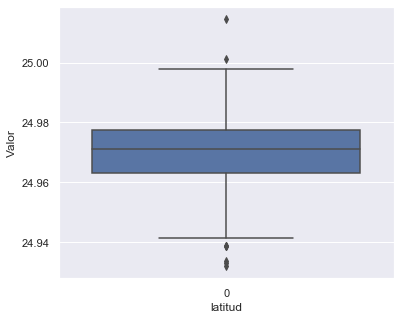

In [197]:
plt.figure(figsize=(6,5))
x = df["latitude"]
ax=sns.boxplot(data=x)
plt.xlabel("latitud")
plt.ylabel("Valor")
plt.savefig('Diagrama de caja latitud.png')
plt.show()

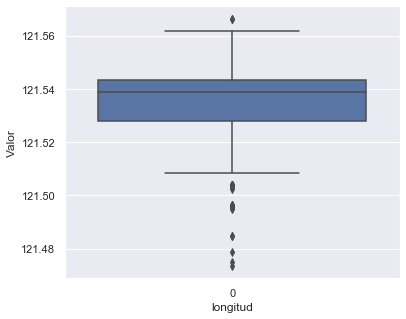

In [198]:
plt.figure(figsize=(6,5))
x = df["longitude"]
ax=sns.boxplot(data=x)
plt.xlabel("longitud")
plt.ylabel("Valor")
plt.savefig('Diagrama de caja longitud.png')
plt.show()

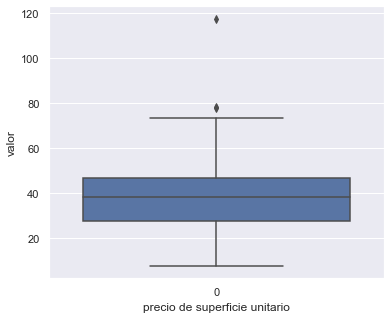

In [199]:
plt.figure(figsize=(6,5))
x = df["house price of unit area"]
ax=sns.boxplot(data=x)
plt.xlabel("precio de superficie unitario")
plt.ylabel("valor")
plt.savefig('Diagrama de caja precio de superficie unitario.png')
plt.show()

## Gráficos de dispersión (individuales)

En este apartado se graficará la dispersión de cada una de las variables independientes respecto a la variable dependiente (House price of unit area)

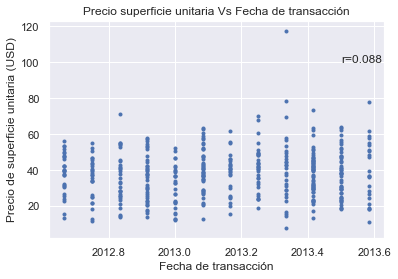

In [200]:
x = df["transaction date"] # Se crea una variable x asociada a la edad de la casa
y = df["house price of unit area"]     # Se crea una variable y asociada a el precio de superficie unitario

plt.plot(x, y, marker=".", linestyle="none") 
plt.title('Precio superficie unitaria Vs Fecha de transacción')
plt.xlabel("Fecha de transacción") 
plt.ylabel("Precio de superficie unitaria (USD)")
plt.text(2013.5,100, "r=%.3f" % np.corrcoef(x,y)[0,1]); # Se agrega texto del coeficiente de correlación
plt.savefig('Relación entre fecha y precio.png')
plt.show()

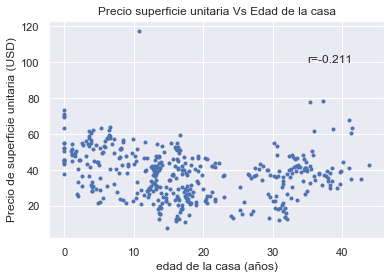

In [201]:
x = df["house age"] # Se crea una variable x asociada a la edad de la casa
y = df["house price of unit area"]     # Se crea una variable y asociada a el precio de superficie unitario

plt.plot(x, y, marker=".", linestyle="none") 
plt.title('Precio superficie unitaria Vs Edad de la casa')
plt.xlabel("edad de la casa (años)") 
plt.ylabel("Precio de superficie unitaria (USD)")
plt.text(35,100, "r=%.3f" % np.corrcoef(x,y)[0,1]); # Se agrega texto del coeficiente de correlación
plt.savefig('Relación entre edad y precio.png')
plt.show()

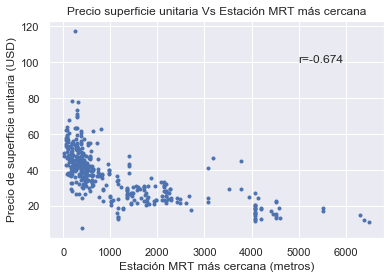

In [202]:
x = df["distance to the nearest MRT station"] # Se crea una variable x asociada a la edad de la casa
y = df["house price of unit area"]     # Se crea una variable y asociada a el precio de superficie unitario

plt.plot(x, y, marker=".", linestyle="none") 
plt.title('Precio superficie unitaria Vs Estación MRT más cercana')
plt.xlabel("Estación MRT más cercana (metros)") 
plt.ylabel("Precio de superficie unitaria (USD)")
plt.text(5000,100, "r=%.3f" % np.corrcoef(x,y)[0,1]); # Se agrega texto del coeficiente de correlación
plt.savefig('Relación entre distancia estación MRT y precio.png')
plt.show()

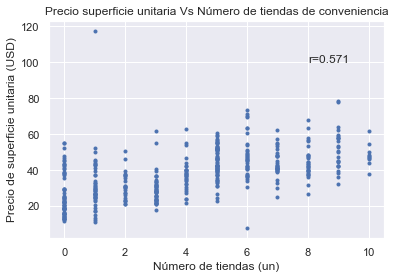

In [203]:
x = df["number of convenience stores"] # Se crea una variable x asociada a la edad de la casa
y = df["house price of unit area"]     # Se crea una variable y asociada a el precio de superficie unitario

plt.plot(x, y, marker=".", linestyle="none") 
plt.title('Precio superficie unitaria Vs Número de tiendas de conveniencia')
plt.xlabel("Número de tiendas (un)") 
plt.ylabel("Precio de superficie unitaria (USD)")
plt.text(8,100, "r=%.3f" % np.corrcoef(x,y)[0,1]); # Se agrega texto del coeficiente de correlación
plt.savefig('Relación entre número de tiendas y precio.png')
plt.show()

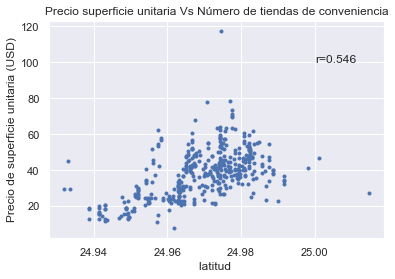

In [204]:
x = df["latitude"] # Se crea una variable x asociada a la edad de la casa
y = df["house price of unit area"]     # Se crea una variable y asociada a el precio de superficie unitario

plt.plot(x, y, marker=".", linestyle="none") 
plt.title('Precio superficie unitaria Vs Número de tiendas de conveniencia')
plt.xlabel("latitud ") 
plt.ylabel("Precio de superficie unitaria (USD)")
plt.text(25,100, "r=%.3f" % np.corrcoef(x,y)[0,1]); # Se agrega texto del coeficiente de correlación
plt.savefig('Relación entre latitud y precio.png')
plt.show()

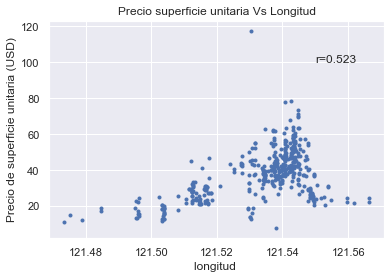

In [205]:
x = df["longitude"] # Se crea una variable x asociada a la edad de la casa
y = df["house price of unit area"]     # Se crea una variable y asociada a el precio de superficie unitario

plt.plot(x, y, marker=".", linestyle="none") 
plt.title('Precio superficie unitaria Vs Longitud')
plt.xlabel("longitud ") 
plt.ylabel("Precio de superficie unitaria (USD)")
plt.text(121.55,100, "r=%.3f" % np.corrcoef(x,y)[0,1]); # Se agrega texto del coeficiente de correlación
plt.savefig('Relación entre longitud y precio.png')
plt.show()

A continuación se realizará la regresión lineal múltiple con 3, 4 y todas las variables con el fin de observar el comportamiento de R cuadrado y la varianza, posteriormente se analizarán los resultados

## Regresión múltiple con 3 variables independientes

##  a) Regresión lineal y ajuste del modelo:

In [206]:
x1 = df["distance to the nearest MRT station"]  
x2 = df["number of convenience stores"]                            
x3 = df["house age"]
y = df["house price of unit area"]                 # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1 + x2 + x3 ', data=df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     161.1
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           5.44e-69
Time:                        22:03:19   Log-Likelihood:                -1506.5
No. Observations:                 414   AIC:                             3021.
Df Residuals:                     410   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9773      1.385     31.041      0.0

## b) Extraer los β estimados:

In [207]:
mod.params

Intercept    42.977286
x1           -0.005379
x2            1.297442
x3           -0.252856
dtype: float64

## c) Extraer el σ2 estimado:

In [208]:
mod.mse_resid

85.58764014385913

## Regresión múltiple con 4 variables independientes

## a) Regresión lineal y ajuste del modelo:

In [209]:
x1 = df["distance to the nearest MRT station"]  
x2 = df["number of convenience stores"]                            
x3 = df["house age"]
x4 = df["latitude"]


y = df["house price of unit area"]                               # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1 + x2 + x3 + x4', data=df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     136.2
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           7.60e-74
Time:                        22:03:20   Log-Likelihood:                -1492.5
No. Observations:                 414   AIC:                             2995.
Df Residuals:                     409   BIC:                             3015.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5916.0065   1112.732     -5.317      0.0

## b) Extraer los β estimados:

In [210]:
mod.params

Intercept   -5916.006496
x1             -0.004175
x2              1.164781
x3             -0.268719
x4            238.635735
dtype: float64

## c) Extraer el σ2 estimado:

In [211]:
mod.mse_resid

80.17504556746252

# Tomando todas las variables

In [212]:
x1 = df["distance to the nearest MRT station"]  
x2 = df["number of convenience stores"]                            
x3 = df["latitude"]
x4 = df["longitude"]
x5 = df["transaction date"]
x6 = df["house age"]
y = df["house price of unit area"]                               # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1 + x2 + x3 + x4 + x5 + x6', data=df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     94.60
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           4.83e-74
Time:                        22:03:20   Log-Likelihood:                -1487.0
No. Observations:                 414   AIC:                             2988.
Df Residuals:                     407   BIC:                             3016.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.444e+04   6775.386     -2.132      0.0

In [213]:
mod.params

Intercept   -14441.982719
x1              -0.004488
x2               1.133325
x3             225.470143
x4             -12.429061
x5               5.149017
x6              -0.269697
dtype: float64

In [214]:
mod.mse_resid

78.45556455931073

Es interesante observar que, no en todos los casos el hecho de añadir más variables independientes a nuestro modelo de regresión lineal, nos dará un modelo más óptimo, esto se debe a que cada variable añadida crea interrelaciones con las demás variables, cambiando el valor del coeficiente de determinación (R cuadrado) y el error. 

En nuestro caso, se observa que el valor de R cuadrado es mayor a medida que se agregan más variables independientes, pero vale aclarar que esto se dio debido a nuestro criterio de escogencia, enfatizamos de nuevo que no siempre añadir más variables nos dará un mejor modelo matemático.